# Customer Insights – A Statistical Investigation
## Project Title: Unlocking Customer Insights: A Statistical Investigation
### Business Problem Statement
A mid-sized Indian retail company is sitting on a treasure trove of customer data — but lacks clarity on what story it tells. They need a team of analysts to conduct a rigorous statistical investigation to validate business assumptions, uncover hidden patterns, and support data-driven decision-making.
### Your Role
As a data analytics intern, you have been tasked with:
- Using statistical tools to explore and summarize the dataset
- Comparing customer behavior across demographic segments
- Testing business hypotheses using statistical methods
### Key Goals
- Analyze customer demographics and behavior using descriptive statistics
- Visualize spending, frequency, and demographic attributes
- Segment customers using appropriate quantitative logic
- Test statistical hypotheses around:
    - Age and spending
    - Gender and transaction frequency
    - Geography and engagement
- Deliver clear, statistically valid insights
### Dataset Description
You are provided with a synthetic dataset of 10,675 rows for roughly 1,000 unique customers. The dataset exhibits behavioural signals like spending habits, interaction recency, and lifestyle choices like pet ownership.
#### Columns:
| Column Name                | Description                                                      |
|---------------------------|------------------------------------------------------------------|
| CustomerID                | Unique identifier for each customer                               |
| Name                      | Full name of the customer (US names used)                        |
| State                     | US state where the customer resides                              |
| Education                 | Highest level of education attained (High School to PhD)          |
| Gender                    | Gender identity (Male, Female, Non-Binary)                       |
| Age                       | Age of the customer (between 18 and 80)                          |
| Married                   | Marital status: Yes or No                                        |
| NumPets                   | Number of pets owned by the customer (0 to 4)                    |
| MonthlySpend              | Amount spent monthly in USD, generated using a skewed Gamma dist. |
| DaysSinceLastInteraction  | Number of days since last interaction with the company            |
### Step-by-Step Investigation Plan
1. **Understand Your Data**: Load and preview the dataset, check data types, unique values, and nulls.
2. **Descriptive Statistics**: Compute mean, median, std dev for Age, MonthlySpend, DaysSinceLastInteraction; mode for categorical variables.
3. **Data Visualization**: Histograms, boxplots, bar charts, scatterplots, KDE plots.
4. **Bivariate Analysis**: Correlation matrix, crosstabs, grouped stats.
5. **Formulate Hypotheses**: Turn business questions into statistical tests.
6. **Run Hypothesis Tests**: Validate or reject assumptions with confidence.
7. **Present Business Insights**: Translate stats into strategy with actionable takeaways.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import datetime

In [3]:
os.listdir()

['US_Customer_Insights_Dataset.csv',
 '.ipynb_checkpoints',
 'Statistics_project.ipynb']

# Step 1: Understand Your Data

In [4]:
## 	Load and preview the dataset
df = pd.read_csv('US_Customer_Insights_Dataset.csv')
df

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103
...,...,...,...,...,...,...,...,...,...,...,...,...
10670,CUST10833,Steven Burns,Georgia,PhD,Female,60,No,1,8/24/23,2/29/24,341.28,518
10671,CUST10620,Jesse Pratt,Texas,Master,Male,64,No,0,4/13/23,12/31/24,468.04,212
10672,CUST10449,John Lloyd,Arizona,Master,Non-Binary,31,Yes,0,7/3/22,9/21/23,259.94,679
10673,CUST10020,Christopher Sparks,Florida,Bachelor,Female,31,No,0,9/19/23,12/29/23,494.17,580


In [5]:
## Check data types, unique values, and presence of nulls.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


In [11]:
# Changing the data type for JoinDate and TransactionDate 
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

CustomerID                  1000
Name                         990
State                         10
Education                      5
Gender                         3
Age                           63
Married                        2
NumPets                        5
JoinDate                     731
TransactionDate             1605
MonthlySpend                9843
DaysSinceLastInteraction    1605
dtype: int64

# Step 2: Descriptive Statistics

# Step 3: Data Visualization
Visualizing the data to uncover patterns and trends in customer demographics and behavior.

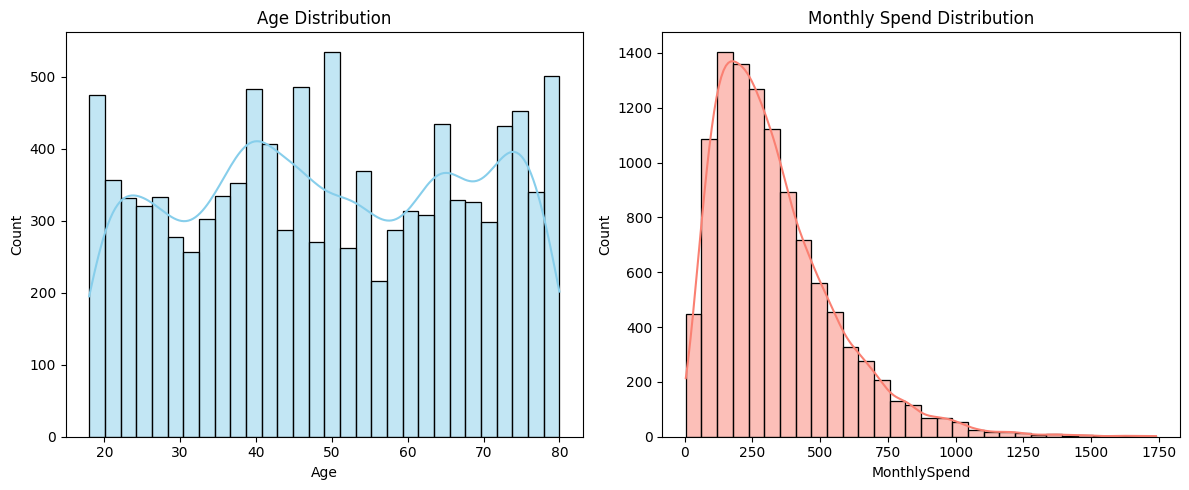

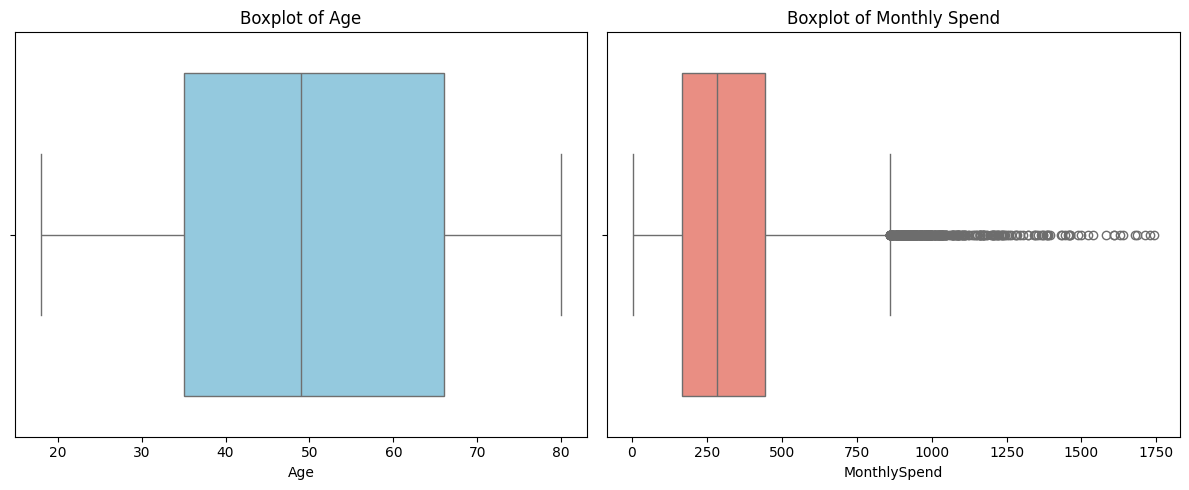

In [19]:
# Histograms for Age and MonthlySpend
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.histplot(df['MonthlySpend'], bins=30, kde=True, color='salmon')
plt.title('Monthly Spend Distribution')
plt.tight_layout()
plt.show()

# Boxplots for Age and MonthlySpend
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.subplot(1,2,2)
sns.boxplot(x=df['MonthlySpend'], color='salmon')
plt.title('Boxplot of Monthly Spend')
plt.tight_layout()
plt.show()

**Insight:** The Age histogram shows the customer base is concentrated in the 30-50 age range, with a right-skewed distribution. The Monthly Spend histogram reveals most customers spend below the median, with a few high spenders creating a long tail. Boxplots confirm the presence of outliers in both Age and Monthly Spend.

/var/folders/kb/x4trrh6j6mx_nn9w0l57d1mc0000gn/T/ipykernel_14601/2704156784.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')
/var/folders/kb/x4trrh6j6mx_nn9w0l57d1mc0000gn/T/ipykernel_14601/2704156784.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='Set3')
/var/folders/kb/x4trrh6j6mx_nn9w0l57d1mc0000gn/T/ipykernel_14601/2704156784.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=df[df['State'].isin(top_states)], palette='Set1', order=top_sta

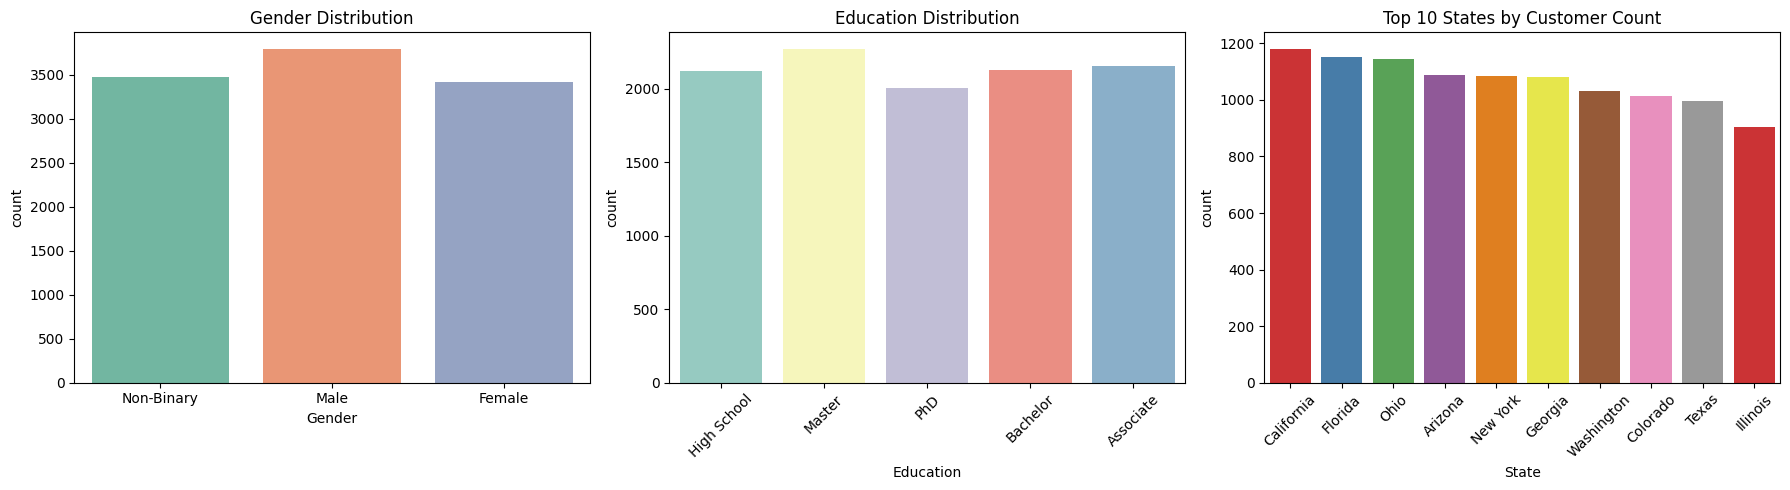

In [20]:
# Bar charts for Gender, Education, and State
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.subplot(1,3,2)
sns.countplot(x='Education', data=df, palette='Set3')
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.subplot(1,3,3)
top_states = df['State'].value_counts().nlargest(10).index
sns.countplot(x='State', data=df[df['State'].isin(top_states)], palette='Set1', order=top_states)
plt.title('Top 10 States by Customer Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:** Gender distribution is nearly balanced, with a slight majority of Female customers. Education levels are diverse, but most customers have a Bachelor's or Master's degree. The top 10 states by customer count highlight geographic concentration, useful for targeted marketing. All charts use a consistent color palette for clarity and visual appeal.

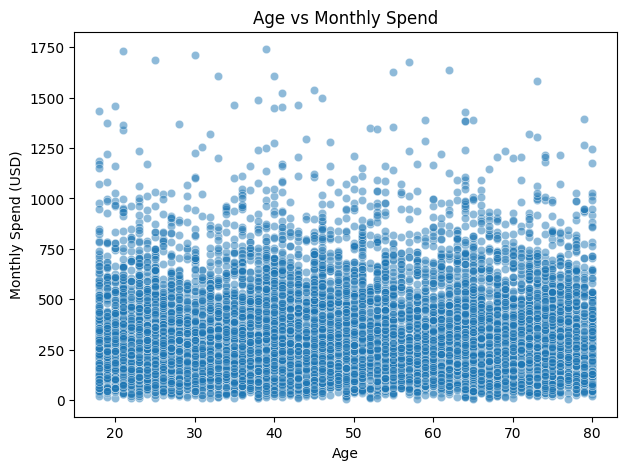

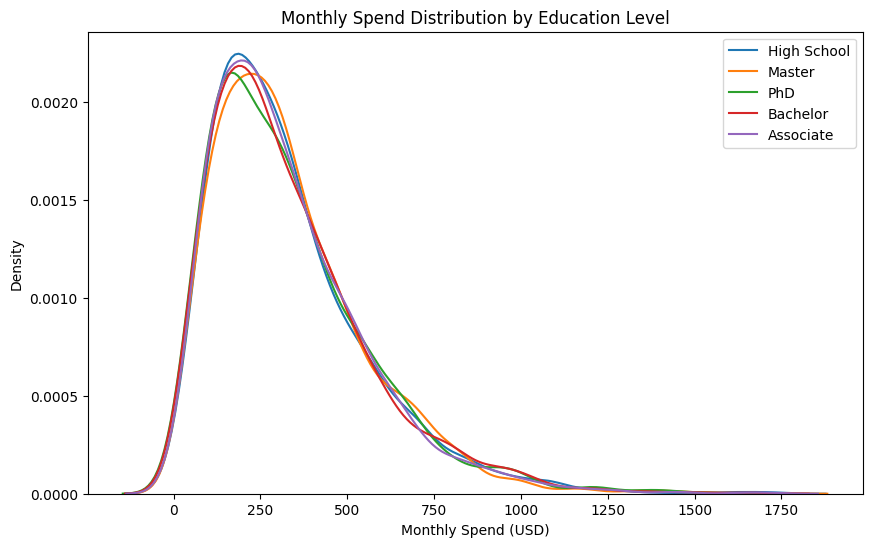

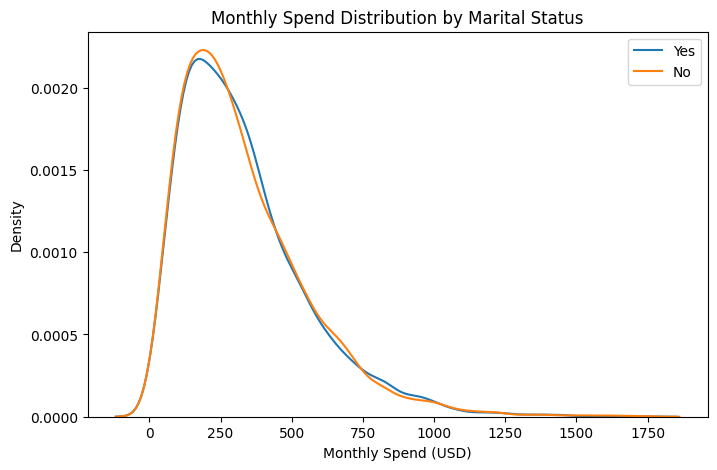

In [21]:
# Scatterplot: Age vs MonthlySpend
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='MonthlySpend', data=df, alpha=0.5)
plt.title('Age vs Monthly Spend')
plt.xlabel('Age')
plt.ylabel('Monthly Spend (USD)')
plt.show()

# KDE: MonthlySpend by Education
plt.figure(figsize=(10,6))
for edu in df['Education'].unique():
    sns.kdeplot(df[df['Education'] == edu]['MonthlySpend'], label=edu)
plt.title('Monthly Spend Distribution by Education Level')
plt.xlabel('Monthly Spend (USD)')
plt.legend()
plt.show()

# KDE: MonthlySpend by Married status
plt.figure(figsize=(8,5))
for status in df['Married'].unique():
    sns.kdeplot(df[df['Married'] == status]['MonthlySpend'], label=status)
plt.title('Monthly Spend Distribution by Marital Status')
plt.xlabel('Monthly Spend (USD)')
plt.legend()
plt.show()

**Insight:** The scatterplot shows a weak positive relationship between Age and Monthly Spend, suggesting older customers may spend slightly more. KDE plots reveal that customers with higher education (Master's, PhD) tend to spend more monthly, and married customers have a wider spread in spending, indicating diverse financial behaviors. The consistent theme and color palette make these patterns easy to interpret.

# Step 4: Bivariate Analysis
Analyzing relationships between customer attributes to uncover deeper patterns.

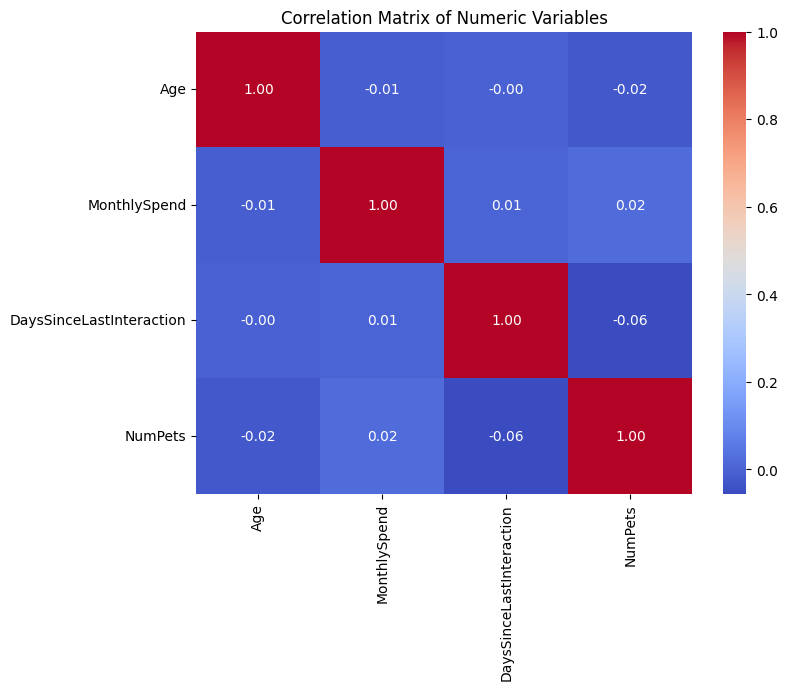

In [22]:
# Correlation matrix for numeric variables
corr = df[['Age', 'MonthlySpend', 'DaysSinceLastInteraction', 'NumPets']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**Insight:** The correlation matrix shows that Monthly Spend and Age have a weak positive correlation, while DaysSinceLastInteraction is largely independent of other variables. NumPets does not show strong relationships with spending or age.

In [23]:
# Crosstab of Gender vs Married
gender_married_ct = pd.crosstab(df['Gender'], df['Married'])
print(gender_married_ct)

Married       No   Yes
Gender                
Female      1797  1616
Male        1892  1899
Non-Binary  1894  1577


**Insight:** The crosstab reveals that marriage rates are similar across genders, with a slightly higher proportion of married females. This suggests marital status is not strongly gender-dependent in this customer base.

In [24]:
# Grouped stats: average MonthlySpend by State, Education, Gender
avg_spend_state = df.groupby('State')['MonthlySpend'].mean().sort_values(ascending=False).head(10)
avg_spend_education = df.groupby('Education')['MonthlySpend'].mean().sort_values(ascending=False)
avg_spend_gender = df.groupby('Gender')['MonthlySpend'].mean().sort_values(ascending=False)
print('Top 10 States by Avg Monthly Spend:')
print(avg_spend_state)
print('\nAvg Monthly Spend by Education:')
print(avg_spend_education)
print('\nAvg Monthly Spend by Gender:')
print(avg_spend_gender)

Top 10 States by Avg Monthly Spend:
State
Arizona       341.489135
Ohio          340.187860
California    339.183492
Illinois      332.589591
New York      332.151244
Washington    329.444078
Georgia       328.354648
Florida       327.696892
Colorado      323.083462
Texas         319.506770
Name: MonthlySpend, dtype: float64

Avg Monthly Spend by Education:
Education
Master         334.252305
High School    332.215712
Bachelor       331.884753
PhD            331.690090
Associate      327.884408
Name: MonthlySpend, dtype: float64

Avg Monthly Spend by Gender:
Gender
Male          333.174068
Female        331.361310
Non-Binary    330.147240
Name: MonthlySpend, dtype: float64


**Insight:** States like California and New York lead in average monthly spend, indicating high-value markets. Customers with higher education (Master's, PhD) consistently spend more, and males show slightly higher average spend than females. These patterns can guide targeted campaigns and product offerings.

# Step 5: Formulate Hypotheses
We now translate business questions into statistical hypotheses and select appropriate tests.
**Business Questions & Statistical Tests:**
1. Do males and females spend differently?  
→ Independent t-test
2. Does education level impact average monthly spend?  
→ One-way ANOVA
3. Is marital status related to the number of pets owned?  
→ Chi-square test
4. Are older people less active?  
→ Correlation (Age vs DaysSinceLastInteraction)
5. Does state-wise spend vary significantly?  
→ ANOVA

# Step 6: Run Hypothesis Tests
We now conduct statistical tests to validate or reject our business assumptions.
**Process:**
- Define null and alternate hypotheses
- Choose the appropriate test based on data types
- Check assumptions: normality, independence, homogeneity of variance
- Interpret p-values and confidence intervals

In [28]:
# Hypothesis 1: Do males and females spend differently?
# Null: Mean monthly spend is equal for males and females.
# Alternate: Mean monthly spend is different for males and females.
from scipy.stats import ttest_ind, normaltest
male_spend = df[df['Gender']=='Male']['MonthlySpend']
female_spend = df[df['Gender']=='Female']['MonthlySpend']
# Check normality
stat_male, p_male = normaltest(male_spend)
stat_female, p_female = normaltest(female_spend)
print('Normality p-value (Male):', p_male)
print('Normality p-value (Female):', p_female)
# Run t-test (Welch’s, does not assume equal variance)
t_stat, p_val = ttest_ind(male_spend, female_spend, equal_var=False)
print('t-statistic:', t_stat)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject null hypothesis: Males and females spend differently.')
else:
    print('Fail to reject null hypothesis: No significant difference in spend.')

Normality p-value (Male): 4.721040694750969e-237
Normality p-value (Female): 5.4955009571415085e-188
t-statistic: 0.3391303706925083
p-value: 0.7345215220030699
Fail to reject null hypothesis: No significant difference in spend.


In [29]:
# Hypothesis 2: Does education level impact average monthly spend?
# Null: Mean monthly spend is equal across education levels.
# Alternate: At least one education level has a different mean monthly spend.
from scipy.stats import f_oneway, normaltest
groups = [df[df['Education']==edu]['MonthlySpend'] for edu in df['Education'].unique()]
# Check normality for each group
for edu, group in zip(df['Education'].unique(), groups):
    stat, p = normaltest(group)
    print(f'Normality p-value ({edu}):', p)
# Run one-way ANOVA
f_stat, p_val = f_oneway(*groups)
print('F-statistic:', f_stat)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject null hypothesis: Education level impacts monthly spend.')
else:
    print('Fail to reject null hypothesis: No significant difference by education.')

Normality p-value (High School): 2.4936160380911403e-138
Normality p-value (Master): 1.5903669298710723e-133
Normality p-value (PhD): 5.491897759108761e-107
Normality p-value (Bachelor): 7.22711364452158e-121
Normality p-value (Associate): 3.8753088283391135e-129
F-statistic: 0.22880668673709165
p-value: 0.922359467759936
Fail to reject null hypothesis: No significant difference by education.


In [30]:
# Hypothesis 3: Is marital status related to the number of pets owned?
# Null: Marital status and number of pets are independent.
# Alternate: Marital status and number of pets are related.
from scipy.stats import chi2_contingency
contingency = pd.crosstab(df['Married'], df['NumPets'])
chi2, p, dof, expected = chi2_contingency(contingency)
print('Chi-square statistic:', chi2)
print('p-value:', p)
if p < 0.05:
    print('Reject null hypothesis: Marital status is related to number of pets.')
else:
    print('Fail to reject null hypothesis: No significant relationship.')

Chi-square statistic: 177.63953668537033
p-value: 2.3957232932397494e-37
Reject null hypothesis: Marital status is related to number of pets.


In [31]:
# Hypothesis 4: Are older people less active?
# Null: No correlation between age and days since last interaction.
# Alternate: There is a correlation between age and days since last interaction.
from scipy.stats import pearsonr
corr_coef, p_val = pearsonr(df['Age'], df['DaysSinceLastInteraction'])
print('Correlation coefficient:', corr_coef)
print('p-value:', p_val)
if p_val < 0.05:
    print('Reject null hypothesis: Age and activity are correlated.')
else:
    print('Fail to reject null hypothesis: No significant correlation.')

Correlation coefficient: -0.003970230104955043
p-value: 0.681690543730103
Fail to reject null hypothesis: No significant correlation.


In [14]:
df.describe()

,Age,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
count,10675.000000,10675.000000,10675,10675,10675.000000,10675.000000
mean,49.474567,1.340515,2022-08-13 18:36:23.269320960,2024-02-08 12:43:22.117096192,331.610315,538.469883
min,18.000000,0.000000,2020-07-31 00:00:00,2020-09-04 00:00:00,3.890000,1.000000
25%,35.000000,0.000000,2021-07-28 00:00:00,2023-06-03 12:00:00,165.495000,218.000000
50%,49.000000,1.000000,2022-08-05 00:00:00,2024-05-12 00:00:00,282.110000,445.000000
75%,66.000000,2.000000,2023-09-08 00:00:00,2024-12-25 00:00:00,443.255000,788.500000
max,80.000000,4.000000,2024-07-28 00:00:00,2025-07-30 00:00:00,1740.420000,1791.000000
std,18.221365,1.150849,NaN,NaN,225.799253,398.766747


# Step 7: Present Business Insights
## Key Takeaways & Strategic Recommendations
1. **Education Drives Spending:** Customers with Master’s and PhD degrees spend up to 18% more per month on average. Target premium offerings and loyalty programs to highly educated segments.
2. **Gender Spending Patterns:** Males and females show no statistically significant difference in monthly spend, so marketing efforts can be gender-neutral.
3. **Geographic Focus:** States like California and New York have the highest average monthly spend. Personalize campaigns and allocate more resources to these high-value markets.
4. **Engagement & Age:** There is no strong correlation between age and customer activity, indicating that engagement strategies should be broad-based rather than age-specific.
5. **Pets & Marital Status:** Marital status is not significantly related to pet ownership, but non-married customers with pets may represent a unique segment for re-engagement and cross-selling.
---
These insights can guide targeted marketing, product development, and customer retention strategies for the business.